- Kategoriske variable i Python
  - Rekodning
- Datakonvertering: 
  - get_dummies
  - explode
- Kod til missing
- Håndtere missing
  - `dropna()`
  - `fillna()`
- Ændre variabeltyper (`astype()`)
  - Øvelse med tekstværdier, som er nødt til at blive lavet til tal
  - `convert_dtypes()`
- Visualiseringsindstillinger
- Kombinere data
  - `concat()`
  - `merge()` (joins)

# Intro

- Ofte er data ikke klar med det samme:
    - Data kan være lagret som forkert type
    - Der kan være værdier, som kan omkodes eller frasorteres
    - Observationer skal filtreres væk
    - Data kan være delt over flere datasæt
    - Datasættet format skal ændres for at fungere til en bestemt type analyse
    
- I disse videoer ser vi nærmere på nogen typiske datahåndteringsudfordringer, som man kan støde på, og hvordan man løser dem i Python
- Vores mål er at foretage klyngeanalyse på tillidsvariable i European Social Survey 2018
- Vær opmærksom på, at vi med vilje har lavet rod i data i disse videoer for netop at vise, hvordan man rydder op i det igen
- Data fra European Social Survey er af høj kvalitet, hvor der er ret godt styr på format, struktur, dokumentation og navne 
- Dog er der meget data derude, hvor det ikke forholder sig sådan

|var |b|s|var2|label|
|----|-|-|----|----|
|trstprl |        byte  |  %15.0g   |  trstprl   | Trust in country's parliament|
|trstlgl   |      byte  |  %15.0g  |   trstlgl  |  Trust in the legal system|
|trstplc   |      byte  |  %15.0g  |   trstplc  |  Trust in the police|
|trstplt   |      byte  |  %15.0g  |   trstplt  | Trust in politicians|
|trstprt   |      byte  |  %15.0g  |   trstprt  | Trust in political parties|
|trstep    |      byte  |  %15.0g  |   trstep   |  Trust in the European Parliament|
|trstun    |      byte  |  %15.0g  |   trstun   |  Trust in the United Nations|


# Rekodning af værdier

- Indlæs data
- Data umiddelbart numerisk - lad os prøve at beregne på det - duer ikke
- Kan gøres med `.loc`, men der er en nemmere måde, når det er alle af den samme værdi i en variabel, som skal ændres

- Gennemgang af `.replace`
    - Enkelt værdi
    - Flere værdier
    - Med i forvejen defineret dictionary
- Gør det smart: `.replace` i for loop

- Så er værdierne lavet til tal - men hvad med 'don't know' osv.?'
- Skal laves til missing - det ser vi på i næste video

In [14]:
import pandas as pd

ess18_trst = pd.read_csv("../datasets/ESS2018DK_trst-subset_raw.csv")

In [15]:
ess18_trst.head()

,idno,cntry,ppltrst,trstprl,trstlgl,trstplc,trstplt,trstprt,trstep,trstun
0,110,DK,8,8,Complete trust,Complete trust,7,8,5,8
1,705,DK,5,6,8,9,3,3,4,1
2,1327,DK,5,7,5,2,5,6,Don't know,Don't know
3,3760,DK,7,5,9,9,5,5,5,8
4,4658,DK,8,8,8,8,6,6,3,Don't know


In [16]:
#ess18_trst['trstprl'].mean()

In [21]:
ess18_trst['trstprl'].value_counts()

8                  302
7                  302
5                  242
6                  205
9                  120
4                  116
3                  102
Complete trust      67
2                   57
No trust at all     31
1                   16
Don't know          12
Name: trstprl, dtype: int64

In [18]:
ess18_trst['trstprl'].replace({"Complete trust": 10}).value_counts()

8                           480
7                           333
9                           206
5                           168
6                           155
10                           83
4                            70
3                            39
2                            24
You can't be too careful      5
1                             5
Don't know                    4
Name: ppltrst, dtype: int64

In [19]:
ess18_trst['trstprl'].replace({"Complete trust": 10, "No trust at all": 0}).value_counts()

8             480
7             333
9             206
5             168
6             155
10             83
4              70
3              39
2              24
0               5
1               5
Don't know      4
Name: ppltrst, dtype: int64

In [22]:
ess18_trst['trstprl'] = ess18_trst['trstprl'].replace({"Complete trust": 10, "No trust at all": 0})

In [23]:
ess18_trst['trstlgl'].value_counts()

9                  405
8                  377
Complete trust     225
7                  213
6                  120
5                   98
4                   47
3                   39
Don't know          15
No trust at all     13
2                   13
1                    5
No answer            1
Refusal              1
Name: trstlgl, dtype: int64

In [24]:
trstval_dict = {"Complete trust": 10, "No trust at all": 0}

ess18_trst['trstlgl'] = ess18_trst['trstlgl'].replace(trstval_dict)

ess18_trst['trstlgl'].value_counts()

9             405
8             377
10            225
7             213
6             120
5              98
4              47
3              39
Don't know     15
0              13
2              13
1               5
No answer       1
Refusal         1
Name: trstlgl, dtype: int64

In [25]:
trstvars = ['trstplc', 'trstplt', 'trstprt', 'trstep', 'trstun']

for var in trstvars:
    ess18_trst[var] = ess18_trst[var].replace(trstval_dict)

In [26]:
ess18_trst['trstun'].value_counts()

8             339
7             284
5             229
6             204
9             138
Don't know     95
4              83
10             67
3              61
2              32
0              20
1              17
Refusal         3
Name: trstun, dtype: int64

# Behandling af missingværdier

- Data indeholder ofte værdier eller andet, som ikke er brugbare for en bestemt analyse. For at undtage disse fra analyse, behandler man dem som missing-værdier
- I Python har missingværdier værdien `NaN` (not a number)

- Kodning til missing med replace (missingværdi hentes ind fra `numpy`)
- replace på et helt datasæt

- Kontrol for missingværdier `.isna()` / `.notna()`
- Optælling af missingværdier

Data klar? Nej, giver stadig fejl. Python behandler stadig variablen som tekst - ser vi nærmere på i næste video

In [29]:
import numpy as np

ess18_trst['trstlgl'].value_counts()

9             405
8             377
10            225
7             213
6             120
5              98
4              47
3              39
Don't know     15
0              13
2              13
1               5
No answer       1
Refusal         1
Name: trstlgl, dtype: int64

In [30]:
ess18_trst['trstlgl'] = ess18_trst['trstlgl'].replace({"Don't know": np.nan, "No answer": np.nan, "Refusal": np.nan})

In [31]:
ess18_trst['trstlgl'].value_counts()

9     405
8     377
10    225
7     213
6     120
5      98
4      47
3      39
0      13
2      13
1       5
Name: trstlgl, dtype: int64

In [33]:
misval_dict = {"Don't know": np.nan, "No answer": np.nan, "Refusal": np.nan}

ess18_trst = ess18_trst.replace(misval_dict)

In [38]:
ess18_trst['trstprl'].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
1567    False
1568    False
1569    False
1570    False
1571    False
Name: trstprl, Length: 1572, dtype: bool

In [42]:
ess18_trst['trstprl'].notna()

0       True
1       True
2       True
3       True
4       True
        ... 
1567    True
1568    True
1569    True
1570    True
1571    True
Name: trstprl, Length: 1572, dtype: bool

In [39]:
ess18_trst['trstprl'].isna().sum()

12

In [40]:
ess18_trst.loc[ess18_trst['trstprl'].isna(), :]

,idno,cntry,ppltrst,trstprl,trstlgl,trstplc,trstplt,trstprt,trstep,trstun
279,87225,DK,3,NaN,7,9,NaN,NaN,9,9
591,104254,DK,10,NaN,NaN,3,3,2,3,1
645,106796,DK,6,NaN,4,6,NaN,NaN,NaN,NaN
664,107444,DK,6,NaN,2,6,6,6,6,NaN
677,108140,DK,5,NaN,8,8,NaN,NaN,NaN,7
817,114277,DK,NaN,NaN,9,9,4,4,NaN,6
936,120170,DK,6,NaN,NaN,8,NaN,NaN,7,NaN
952,120972,DK,8,NaN,8,7,7,7,4,7
1049,125805,DK,10,NaN,8,8,6,NaN,8,8
1081,127056,DK,9,NaN,7,7,5,5,10,9


In [43]:
ess18_trst.dropna() # læg mærke til rækkenumre

,idno,cntry,ppltrst,trstprl,trstlgl,trstplc,trstplt,trstprt,trstep,trstun
0,110,DK,8,8,10,10,7,8,5,8
1,705,DK,5,6,8,9,3,3,4,1
3,3760,DK,7,5,9,9,5,5,5,8
5,5816,DK,7,5,6,6,4,6,3,7
6,7251,DK,5,5,6,8,5,4,7,6
...,...,...,...,...,...,...,...,...,...,...
1566,149856,DK,7,9,7,8,6,6,6,4
1567,149977,DK,8,6,9,9,5,4,6,8
1568,150131,DK,10,6,8,8,6,6,5,8
1569,150359,DK,8,5,10,9,5,2,5,8


In [44]:
#ess18_trst['trstprl'].mean()

# Konvertering af datatype (casting)

- Python adskiller mellem værdityper
- Prøver vi at bruge metoder på værdityper, hvor det ikke giver mening, får vi fejl
- Typisk fejl man støder på: `TypeError`
- Tjek typen: `.dtypes`
- Konverter typen: `.astype`
- Tekst/tal typefejl er typiske
- Anden brugbar type (som ikke er relevant her): datotype
- Pandas har også en kategorisk type - denne ser vi på i en senere video

Vi har nu tillidsvariable klar. Men hvad med baggrundsvariable? - det kigger vi på i næste video

In [47]:
ess18_trst['trstprl'].value_counts() #ser rigtig ud

8     302
7     302
5     242
6     205
9     120
4     116
3     102
10     67
2      57
0      31
1      16
Name: trstprl, dtype: int64

In [45]:
#ess18_trst['trstprl'].mean()

In [46]:
ess18_trst['trstprl'].dtypes

dtype('O')

In [50]:
ess18_trst['trstprl'].astype('float')

0       8.0
1       6.0
2       7.0
3       5.0
4       8.0
       ... 
1567    6.0
1568    6.0
1569    5.0
1570    8.0
1571    8.0
Name: trstprl, Length: 1572, dtype: float64

In [51]:
ess18_trst['trstprl'] = ess18_trst['trstprl'].astype('float')

In [52]:
trstvars = ['trstplc', 'trstplt', 'trstprt', 'trstep', 'trstun']

for var in trstvars:
    ess18_trst[var] = ess18_trst[var].astype('float')

In [53]:
ess18_trst['trstprl'].mean()

6.166666666666667

# Merge/join

- Ofte kan vi have brug for at sætte data sammen
- For surveys kan det fx være pga. forskellige interviewrunder
- For registerdata fordi data ligger i forskellige registre
- Data kan nogen gange også være indsamlet uafhængigt af hinanden (fx data på kommuneniveau, virksomhedsniveau, landeniveau eller andet)

![mario](./img/data-in-other-dataset.png)

- Gennemgå forskellige joins ("teoretisk")
- Gennemgå `pd.merge()`
- Brug af `pd.merge()` på ESS data

In [101]:
ess18_trst.head()

,idno,cntry,ppltrst,trstprl,trstlgl,trstplc,trstplt,trstprt,trstep,trstun
0,110,DK,8,8.0,10,10.0,7.0,8.0,5.0,8.0
1,705,DK,5,6.0,8,9.0,3.0,3.0,4.0,1.0
2,1327,DK,5,7.0,5,2.0,5.0,6.0,NaN,NaN
3,3760,DK,7,5.0,9,9.0,5.0,5.0,5.0,8.0
4,4658,DK,8,8.0,8,8.0,6.0,6.0,3.0,NaN


In [104]:
ess18_bcg = pd.read_csv('../datasets/ESS2018DK_bcg-subset_raw.csv')

In [116]:
ess18_bcg.head()

,idno,gndr,agea,region,prtvtddk,edlvddk,infqbst,grspnum
0,110,Male,69,DK04,Socialdemokratiet - The Social democrats,Kort videregående uddannelse af op til 2-3 års...,Don't know,NaN
1,705,Male,60,DK05,Det Konservative Folkeparti - Conservative Peo...,Kort videregående uddannelse af op til 2-3 års...,Annual,NaN
2,1327,Male,18,DK02,Not applicable,Folkeskole 9.-10. klasse,No answer,NaN
3,3760,Male,16,DK04,Not applicable,Folkeskole 9.-10. klasse,Weekly,200.0
4,4658,Female,62,DK02,Refusal,Kort videregående uddannelse af op til 2-3 års...,Annual,NaN


![image.png](https://www.ionos.ca/digitalguide/fileadmin/DigitalGuide/Screenshots_2018/Outer-Join.jpg)

In [58]:
#?pd.merge

In [117]:
ess18_merged = pd.merge(ess18_trst, ess18_bcg, on = 'idno', how = 'left')

In [118]:
ess18_merged.head()

,idno,cntry,ppltrst,trstprl,trstlgl,trstplc,trstplt,trstprt,trstep,trstun,gndr,agea,region,prtvtddk,edlvddk,infqbst,grspnum
0,110,DK,8,8.0,10,10.0,7.0,8.0,5.0,8.0,Male,69,DK04,Socialdemokratiet - The Social democrats,Kort videregående uddannelse af op til 2-3 års...,Don't know,NaN
1,705,DK,5,6.0,8,9.0,3.0,3.0,4.0,1.0,Male,60,DK05,Det Konservative Folkeparti - Conservative Peo...,Kort videregående uddannelse af op til 2-3 års...,Annual,NaN
2,1327,DK,5,7.0,5,2.0,5.0,6.0,NaN,NaN,Male,18,DK02,Not applicable,Folkeskole 9.-10. klasse,No answer,NaN
3,3760,DK,7,5.0,9,9.0,5.0,5.0,5.0,8.0,Male,16,DK04,Not applicable,Folkeskole 9.-10. klasse,Weekly,200.0
4,4658,DK,8,8.0,8,8.0,6.0,6.0,3.0,NaN,Female,62,DK02,Refusal,Kort videregående uddannelse af op til 2-3 års...,Annual,NaN


# Visualisering

- Vi har nu data klar og kan lave en visualisering
- Scatterplot - outliers - fix
- Plot - aksenavne - hvordan ændres?
- Ticks
- Titel
- Gem

In [119]:
ess18_merged.head()

,idno,cntry,ppltrst,trstprl,trstlgl,trstplc,trstplt,trstprt,trstep,trstun,gndr,agea,region,prtvtddk,edlvddk,infqbst,grspnum
0,110,DK,8,8.0,10,10.0,7.0,8.0,5.0,8.0,Male,69,DK04,Socialdemokratiet - The Social democrats,Kort videregående uddannelse af op til 2-3 års...,Don't know,NaN
1,705,DK,5,6.0,8,9.0,3.0,3.0,4.0,1.0,Male,60,DK05,Det Konservative Folkeparti - Conservative Peo...,Kort videregående uddannelse af op til 2-3 års...,Annual,NaN
2,1327,DK,5,7.0,5,2.0,5.0,6.0,NaN,NaN,Male,18,DK02,Not applicable,Folkeskole 9.-10. klasse,No answer,NaN
3,3760,DK,7,5.0,9,9.0,5.0,5.0,5.0,8.0,Male,16,DK04,Not applicable,Folkeskole 9.-10. klasse,Weekly,200.0
4,4658,DK,8,8.0,8,8.0,6.0,6.0,3.0,NaN,Female,62,DK02,Refusal,Kort videregående uddannelse af op til 2-3 års...,Annual,NaN


<AxesSubplot:xlabel='trstprl', ylabel='grspnum'>

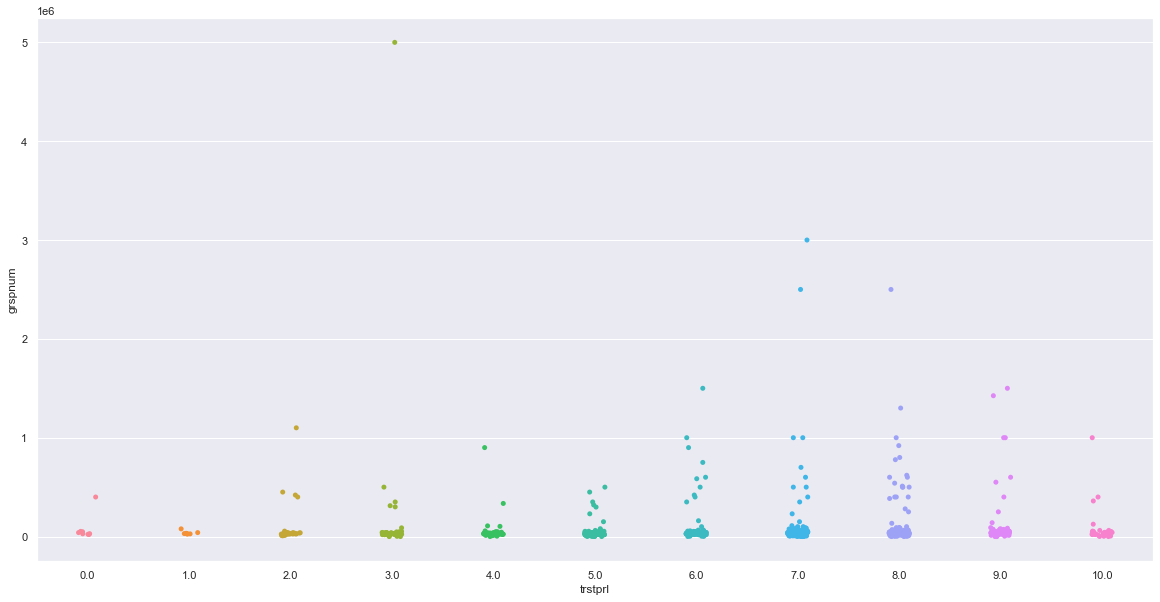

In [144]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.set(rc={'figure.figsize':(20,10)})

sns.stripplot(data = ess18_merged, x = 'trstprl', y = 'grspnum')

In [129]:
ess18_merged['infqbst'].value_counts()

Monthly           1285
Annual              99
Not applicable      77
No answer           47
Weekly              35
Don't know          18
Refusal             11
Name: infqbst, dtype: int64

In [135]:
ess18_monthly = ess18_merged.loc[ess18_merged['infqbst'] == 'Monthly']

<AxesSubplot:xlabel='trstprl', ylabel='grspnum'>

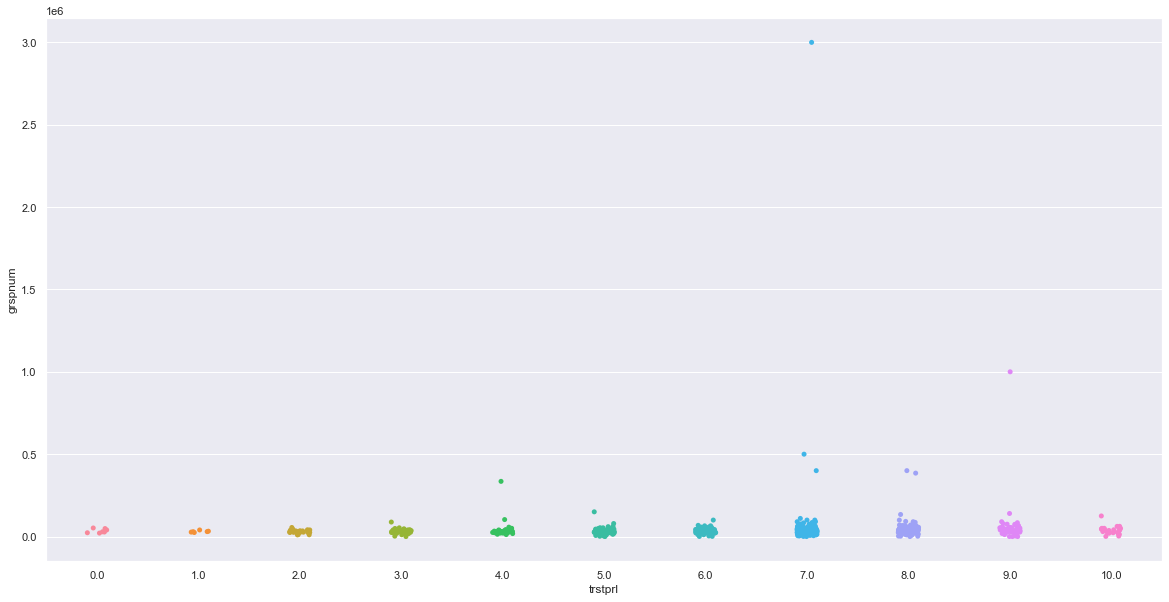

In [136]:
sns.stripplot(data = ess18_monthly, x = 'trstprl', y = 'grspnum')

In [137]:
ess18_monthly['grspnum'].describe()

count    7.150000e+02
mean     4.368549e+04
std      1.221933e+05
min      0.000000e+00
25%      2.600000e+04
50%      3.200000e+04
75%      4.100000e+04
max      3.000000e+06
Name: grspnum, dtype: float64

In [138]:
ess18_monthly.loc[ess18_monthly['grspnum'] > 100000].shape

(14, 17)

In [139]:
ess18_monthly = ess18_monthly.loc[ess18_monthly['grspnum'] < 100000]

<AxesSubplot:xlabel='trstprl', ylabel='grspnum'>

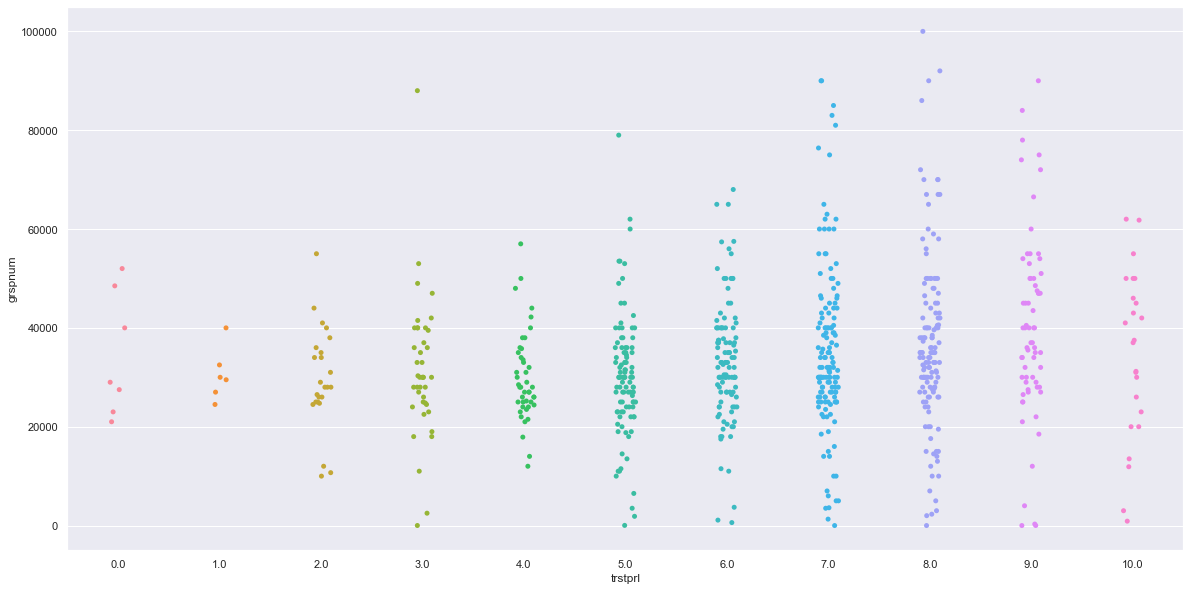

In [140]:
sns.stripplot(data = ess18_monthly, x = 'trstprl', y = 'grspnum')

<AxesSubplot:xlabel='trstprl', ylabel='grspnum'>

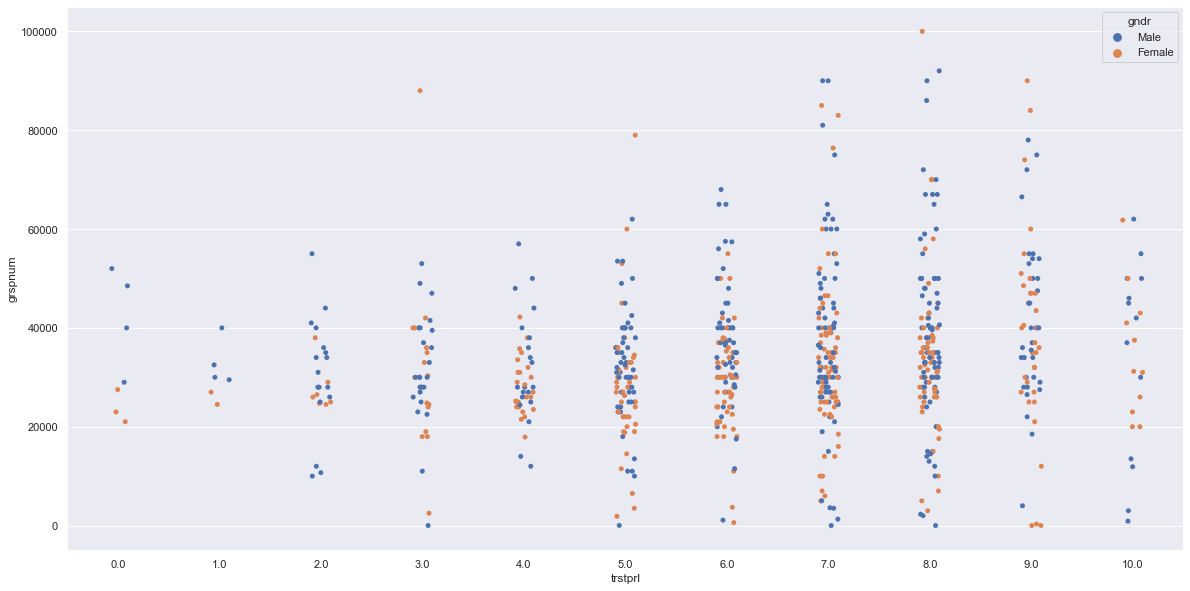

In [142]:
sns.stripplot(data = ess18_monthly, x = 'trstprl', y = 'grspnum', hue = 'gndr')

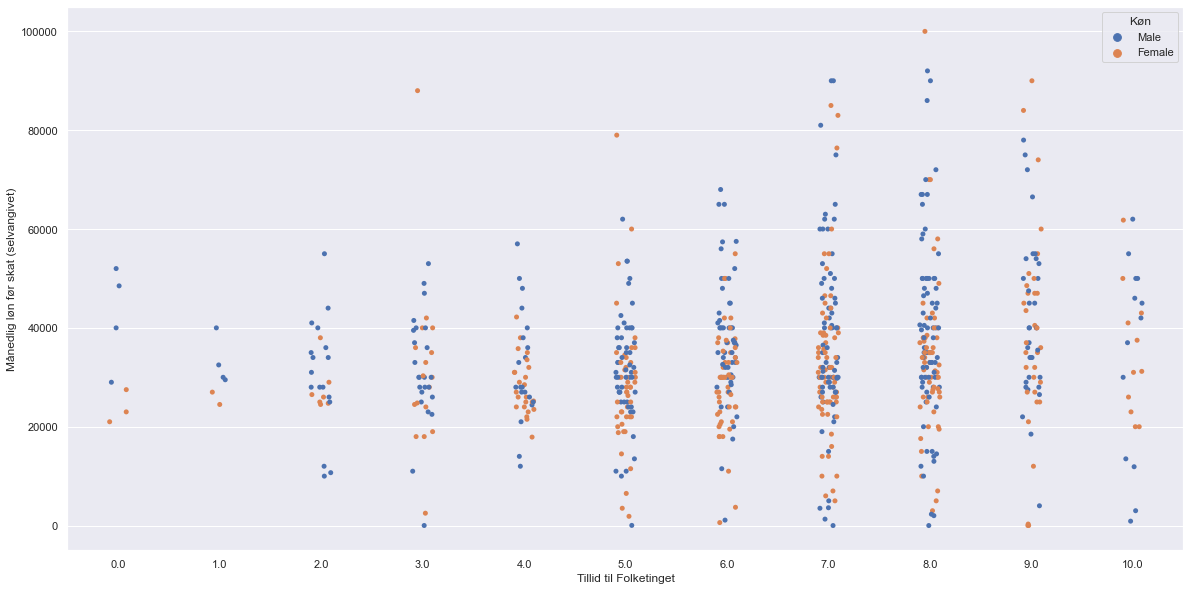

In [145]:
sns.stripplot(data = ess18_monthly, x = 'trstprl', y = 'grspnum', hue = 'gndr')
plt.xlabel("Tillid til Folketinget")
plt.ylabel("Månedlig løn før skat (selvangivet)")
plt.legend(title = "Køn")

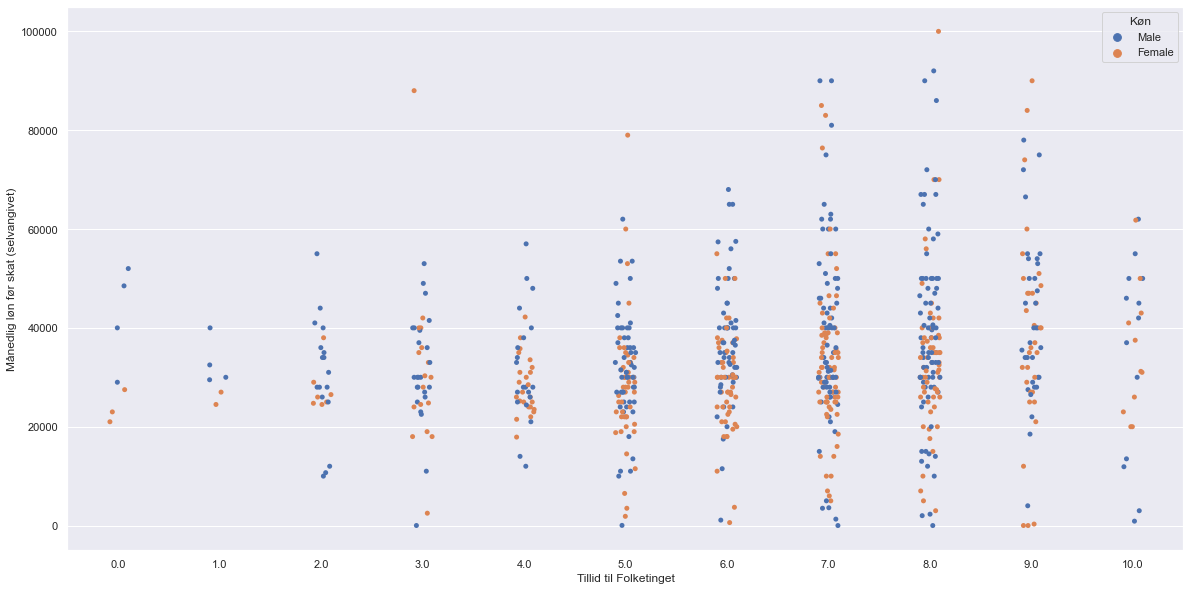

In [147]:
sns.stripplot(data = ess18_monthly, x = 'trstprl', y = 'grspnum', hue = 'gndr')
plt.xlabel("Tillid til Folketinget")
plt.ylabel("Månedlig løn før skat (selvangivet)")
plt.legend(title = "Køn")
plt.savefig('ess18_trst-pay.png', dpi = 200)

# Supplerende: Kategorisk type

- Tillidsvariablene i ESS er teknisk set ordinalt skalerede kategoriske variable - vi kan bare have brug for at behandle dem numerisk for at inkludere dem i en klyngeanalyse
- Dog kan vi også fortælle Python, at en variabel er kategorisk
- Simpel konvertering (nominal): `.astype('categorical')` - denne giver ikke mulighed for at gøre det ordinalt
- Lad pandas gætte typen: `.convert_dtypes()`
- Konvertering til ordinal: Dan en `CategoricalDtype` og brug `.astype()`
- Forskel på nominal og ordinal? Pandas genkender rangorden

- Brug af kategorisk i fx klyngeanalyse. `pd.get_dummies()`